In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils

from behav_analysis import analyze_expt1
from behav_analysis import analyze_expt2

In [4]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()

trial_data_all, subjects, subject_cb, cue_level_names, image_type_names = analyze_expt1.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_condition1_excludebirds, dprime_by_condition1_excludebirds, \
    propyes_by_condition1_excludebirds, rt_by_condition1_excludebirds = \
        analyze_expt1.get_perf_by_cond_excludebirds()

acc_by_condition2_excludebirds, dprime_by_condition2_excludebirds, \
    propyes_by_condition2_excludebirds, rt_by_condition2_excludebirds = \
        analyze_expt2.get_perf_by_cond_excludebirds()


#### Plotting params

In [5]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = [-0.05, 0.05]

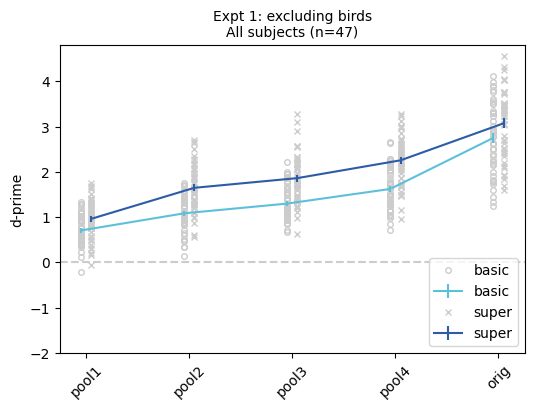

In [7]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(6,4))

  
ax = plt.subplot(1,1,1)

lh = []
for cc, cue in enumerate(cue_level_names):

    vals = dprime_by_condition1_excludebirds[:,cc,:]
    
    n_subs_plot = vals.shape[0]

    h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals.T,\
             point_types[cc],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
                markersize=markersize)
    lh.append(h[0])

    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

    h = plt.errorbar(np.arange(n_image_types)+xjitters[cc], \
                     meanvals, \
                     semvals, \
                    color = cue_level_colors[cc,:])

    lh.append(h)

    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

ax.legend(lh, np.repeat(cue_level_names,2), loc='lower right')

plt.ylabel('d-prime')

plt.ylim([-2, 4.8])

plt.title('Expt 1: excluding birds\nAll subjects (n=%d)'%(n_subs_plot));

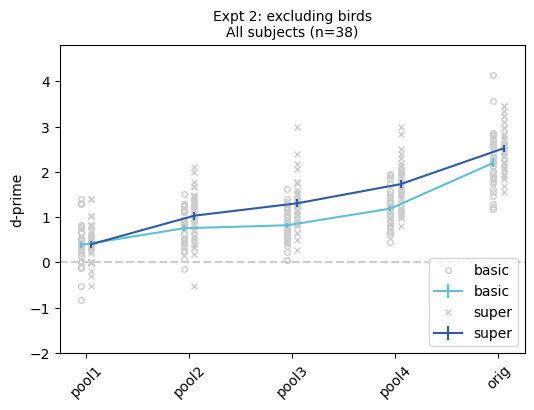

In [8]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(6,4))

  
ax = plt.subplot(1,1,1)

lh = []
for cc, cue in enumerate(cue_level_names):

    vals = dprime_by_condition2_excludebirds[:,cc,:]
    
    n_subs_plot = vals.shape[0]

    h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals.T,\
             point_types[cc],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
                markersize=markersize)
    lh.append(h[0])

    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

    h = plt.errorbar(np.arange(n_image_types)+xjitters[cc], \
                     meanvals, \
                     semvals, \
                    color = cue_level_colors[cc,:])

    lh.append(h)

    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

ax.legend(lh, np.repeat(cue_level_names,2), loc='lower right')

plt.ylabel('d-prime')

plt.ylim([-2, 4.8])

plt.title('Expt 2: excluding birds\nAll subjects (n=%d)'%(n_subs_plot));